In [1]:
import pandas as pd
import os
import datetime as dt

### Prepare Dataset

#### Merging 12 months of sales data into a single CSV file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

#### Read in updated dataframe

In [3]:
all_data_df = pd.read_csv("all_data.csv")
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [4]:
all_data_df["Order Date"] = pd.to_datetime(all_data_df["Order Date"], format= "%m/%d/%y %H:%M", errors="coerce")

In [16]:
all_data_df["Quantity Ordered"] = pd.to_numeric(all_data_df["Quantity Ordered"])
all_data_df["Price Each"] = pd.to_numeric(all_data_df["Price Each"])

### Clean up the data 

#### Drop rows of NAN

In [5]:
nan_df = all_data_df[all_data_df.isna().any(axis=1)]
nan_df.head()

all_data_df = all_data_df.dropna(how="all")
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


#### delete NaT value in order date column

In [6]:
nat_df = all_data_df[all_data_df["Order Date"].isna()]
nat_df

all_data_df = all_data_df[all_data_df["Order Date"].notna()]
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


#### Add additional columns for analysis

In [42]:
all_data_df["Order Month"] = all_data_df["Order Date"].dt.month.astype("category")

In [35]:
all_data_df["Sales"] = all_data_df["Quantity Ordered"] * all_data_df["Price Each"]

In [51]:
all_data_df["City"] = all_data_df["Purchase Address"].str.split(", ").str.get(1)

### Analysis

#### Q1: What was the best month for sales? How much was earned that month?

In [24]:
results = all_data_df.groupby("Order Month").sum(numeric_only=True)

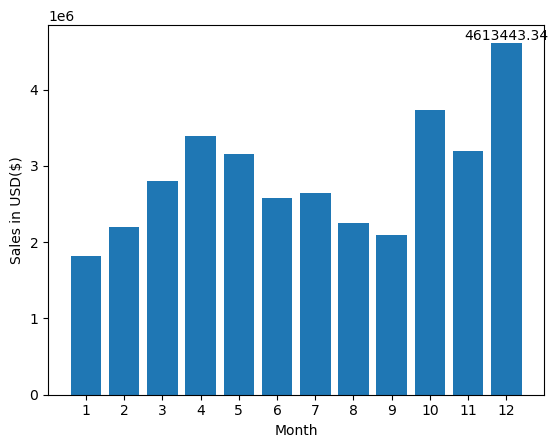

In [34]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel('Sales in USD($)')
plt.text(12, results["Sales"].max(), str(results["Sales"].max()), ha='center', va='bottom')
plt.show()

#### Q2: What City had the highest number of sales?

In [61]:
results = all_data_df.groupby("City").sum(numeric_only=True)
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602,2779908.20,2795498.58
Austin,11153,1809873.61,1819581.75
Boston,22528,3637409.77,3661642.01
Dallas,16730,2752627.82,2767975.40
Los Angeles,33289,5421435.23,5452570.80
New York City,27932,4635370.83,4664317.43
Portland,14053,2307747.47,2320490.61
San Francisco,50239,8211461.74,8262203.91
Seattle,16553,2733296.01,2747755.48


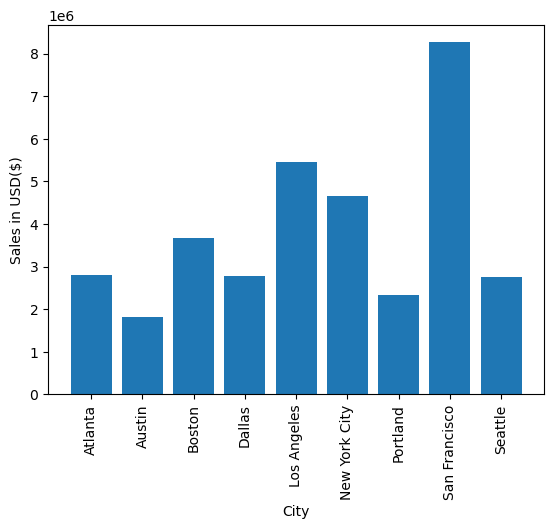

In [60]:
import matplotlib.pyplot as plt

cities = results.index
plt.bar(cities, results["Sales"])
plt.xlabel("City")
plt.xticks(cities, rotation='vertical', size=10)
plt.ylabel('Sales in USD($)')
plt.show()

#### Q3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

#### Q4: What products are most often sold together?

#### Q5: What product sold the most? Why do you think it sold the most?